In [ ]:
from my_function import *
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score,mean_squared_error
from pmdarima import auto_arima

import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.rcParams['figure.figsize'] = (12,10)
plt.rcParams['figure.dpi'] = 200

In [ ]:
df = pd.read_csv('./data/day_wise.csv', index_col='Date', parse_dates=True)
y = df['Confirmed']

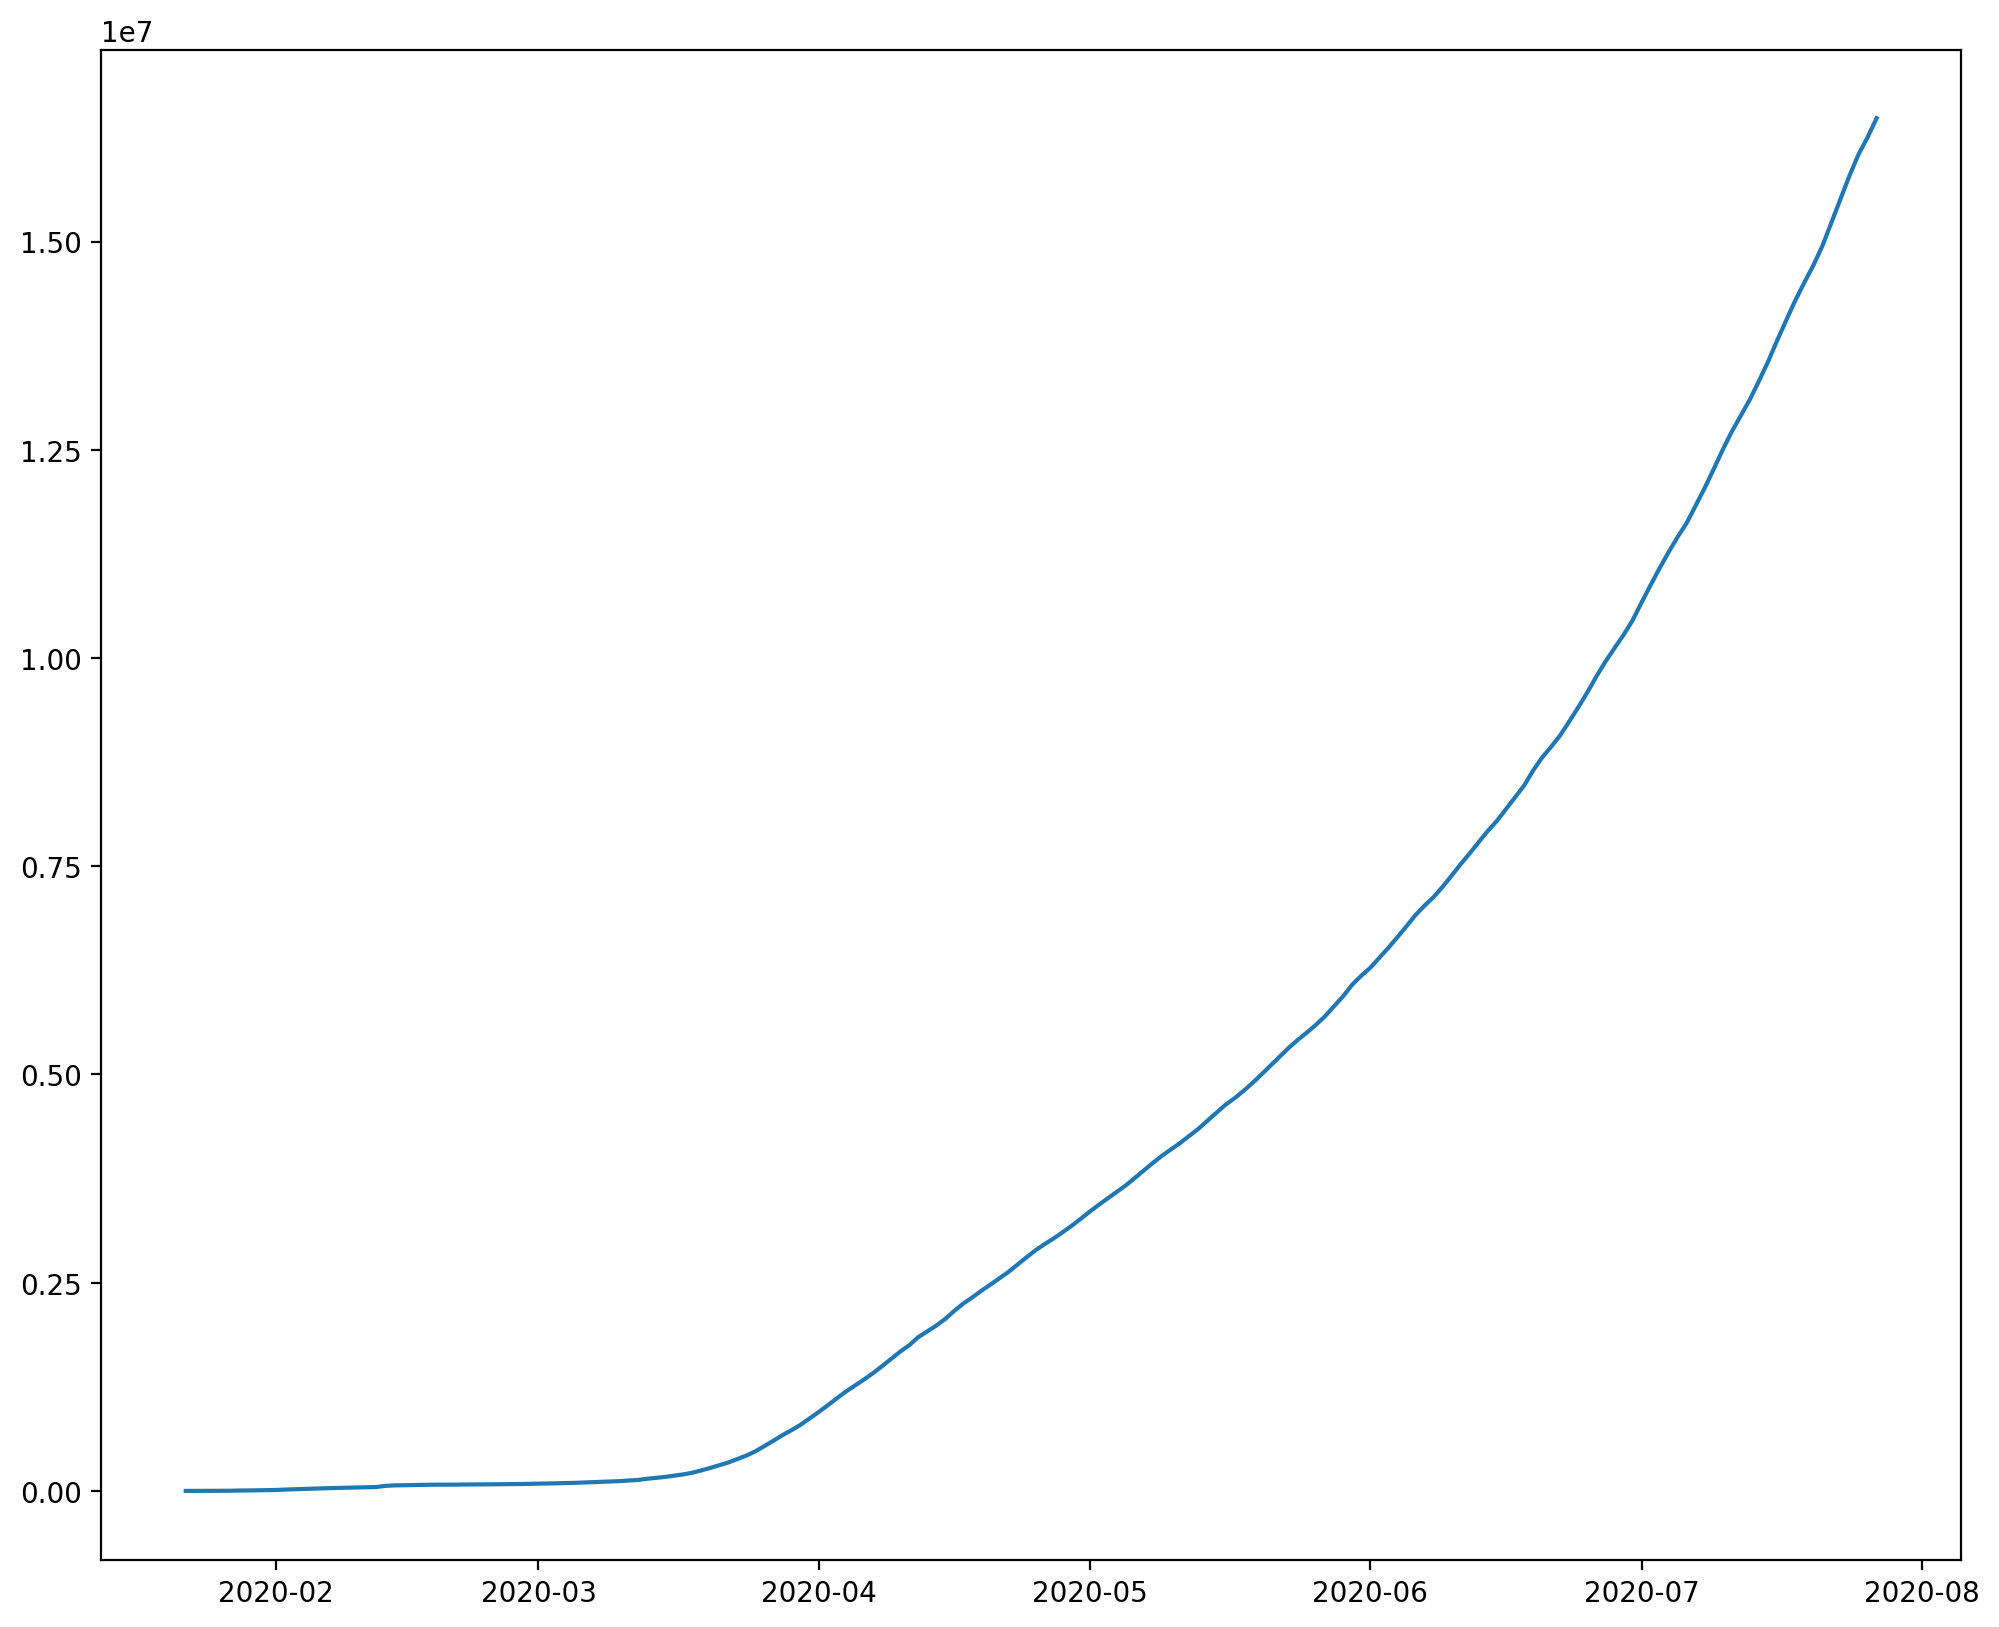

In [ ]:
plt.plot(y)

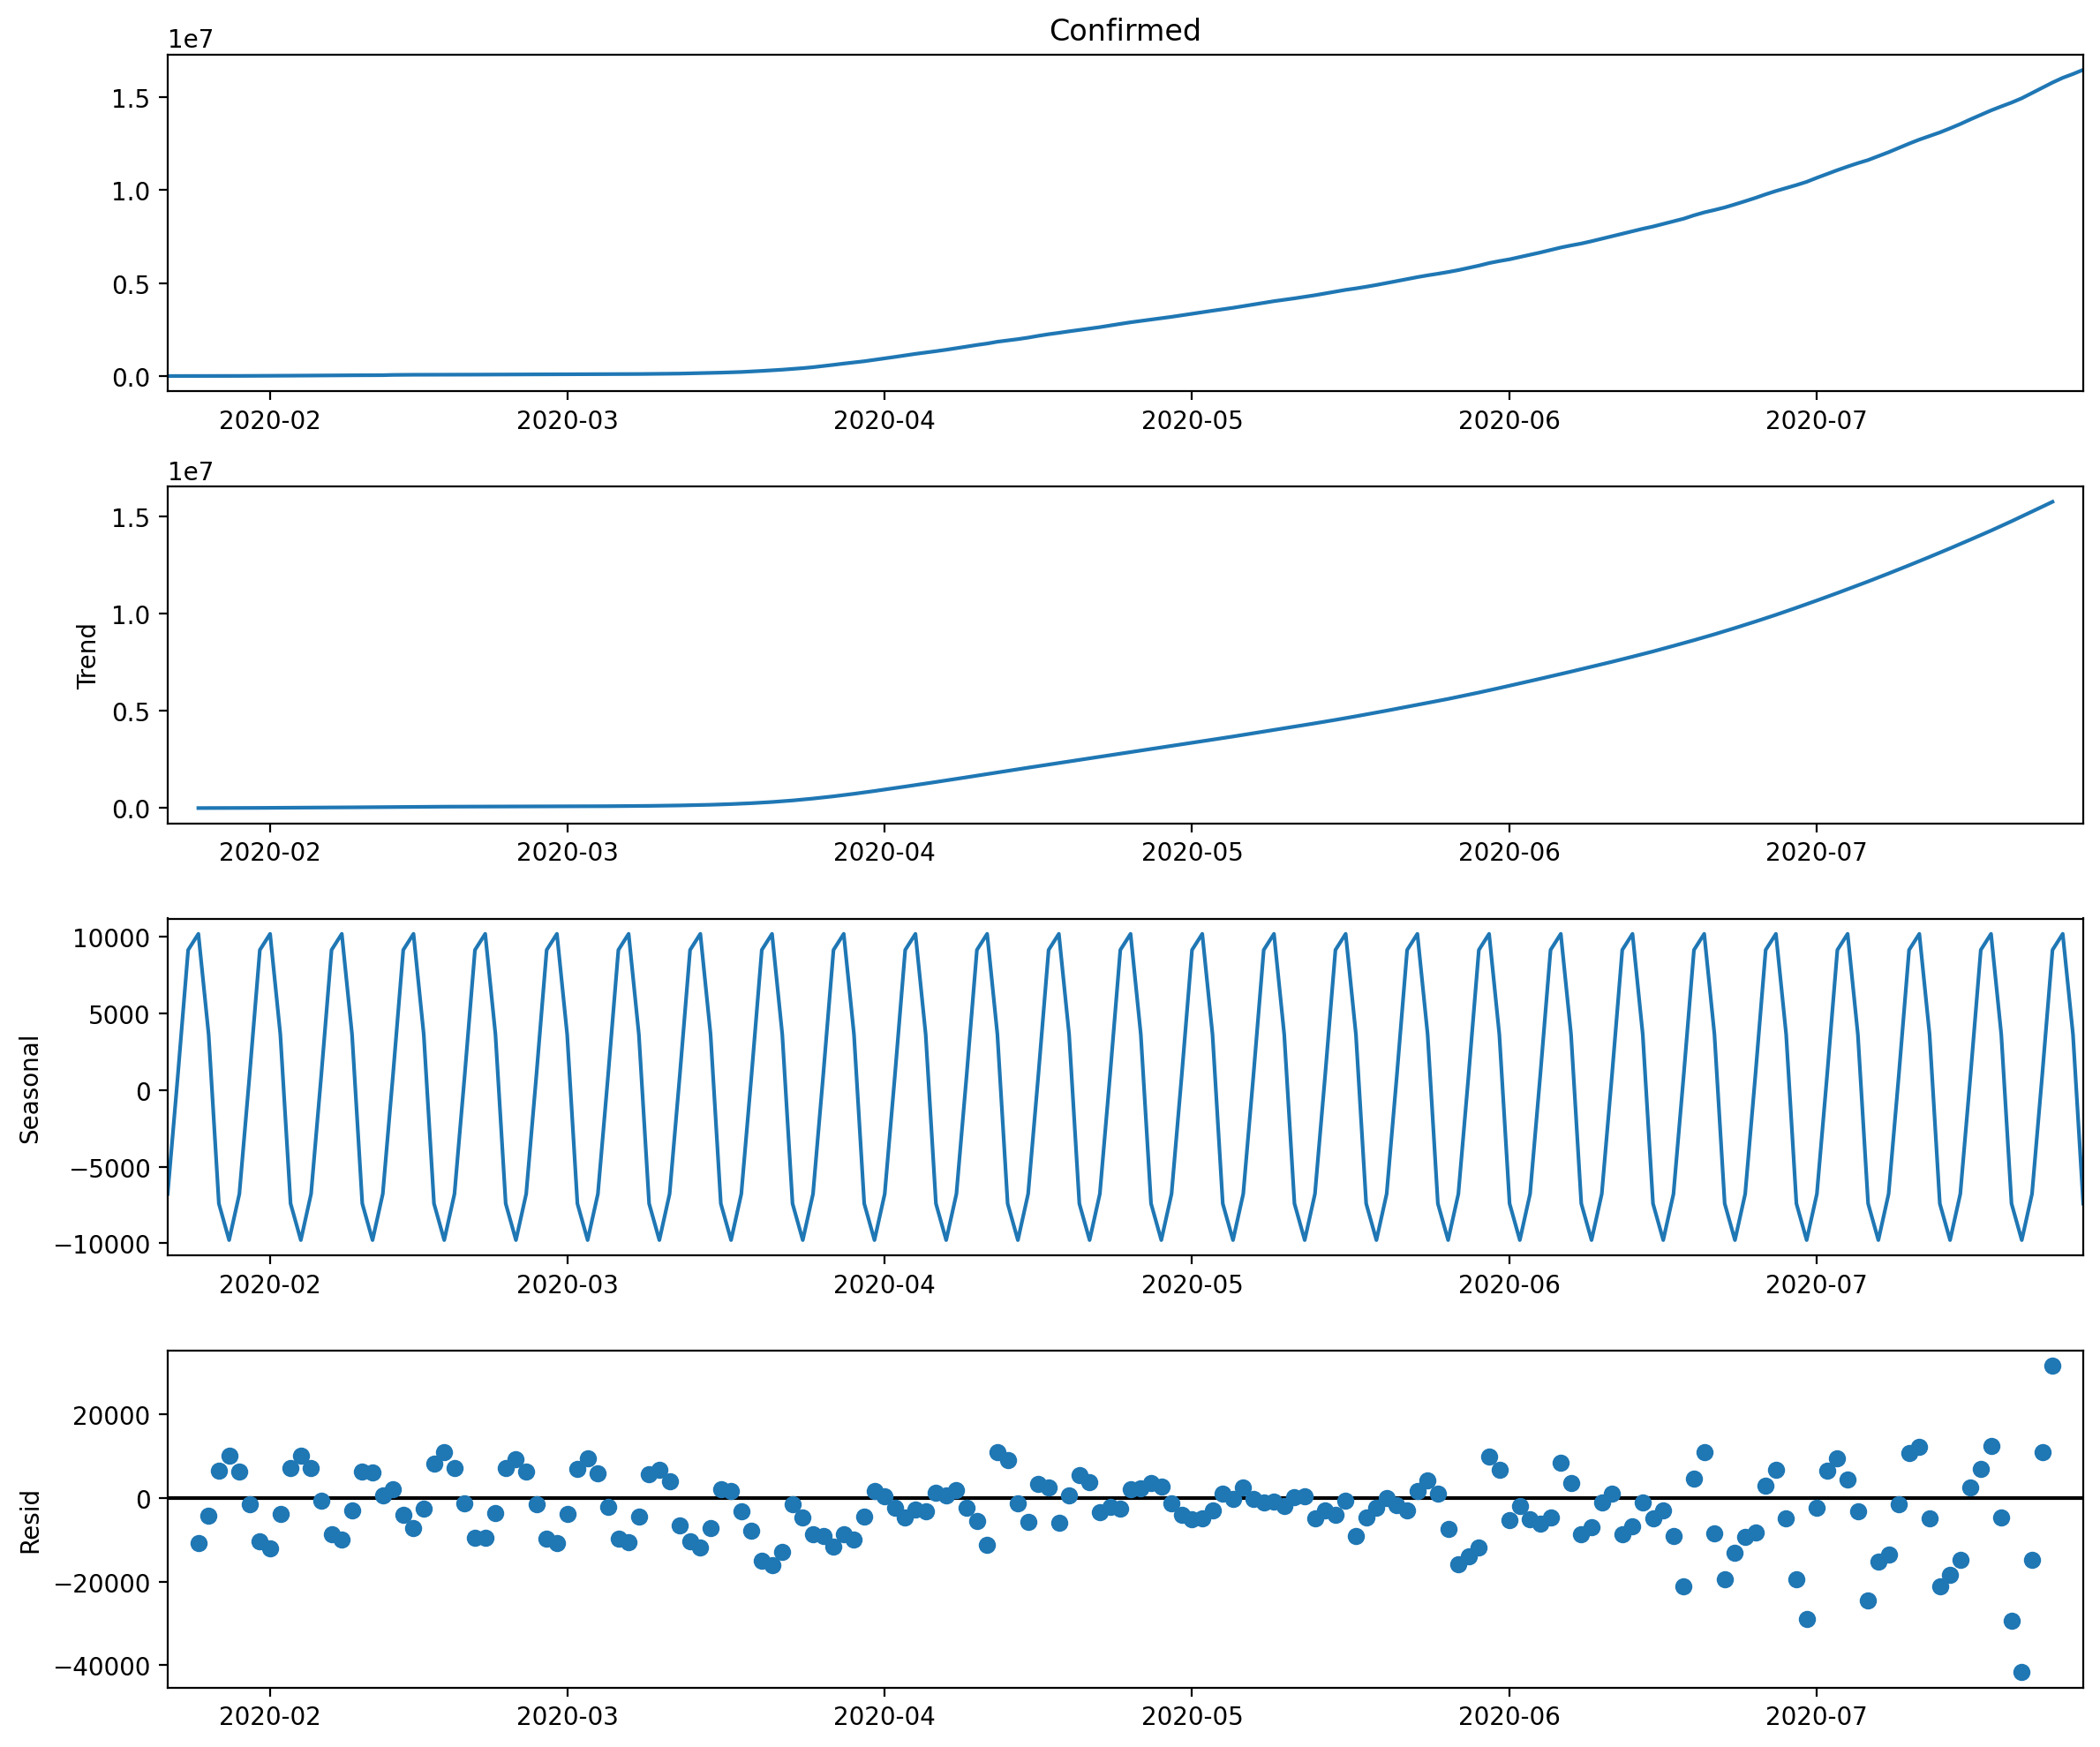

In [ ]:
decompose = seasonal_decompose(y)
decompose.plot();

In [ ]:
print(ADF(y))

ADF                       2.056470
p value                   0.998742
lags                     11.000000
oservation              176.000000
Critical value (1%)      -3.468062
Critical value (5%)      -2.878106
Critical value (10%)     -2.575602
dtype: float64


In [ ]:
y_log = np.log(y)
print(ADF(y_log))

ADF                      -3.509179
p value                   0.007754
lags                     15.000000
oservation              172.000000
Critical value (1%)      -3.468952
Critical value (5%)      -2.878495
Critical value (10%)     -2.575809
dtype: float64


In [ ]:
train = y_log.iloc[:-5]
test = y_log.iloc[-5:]

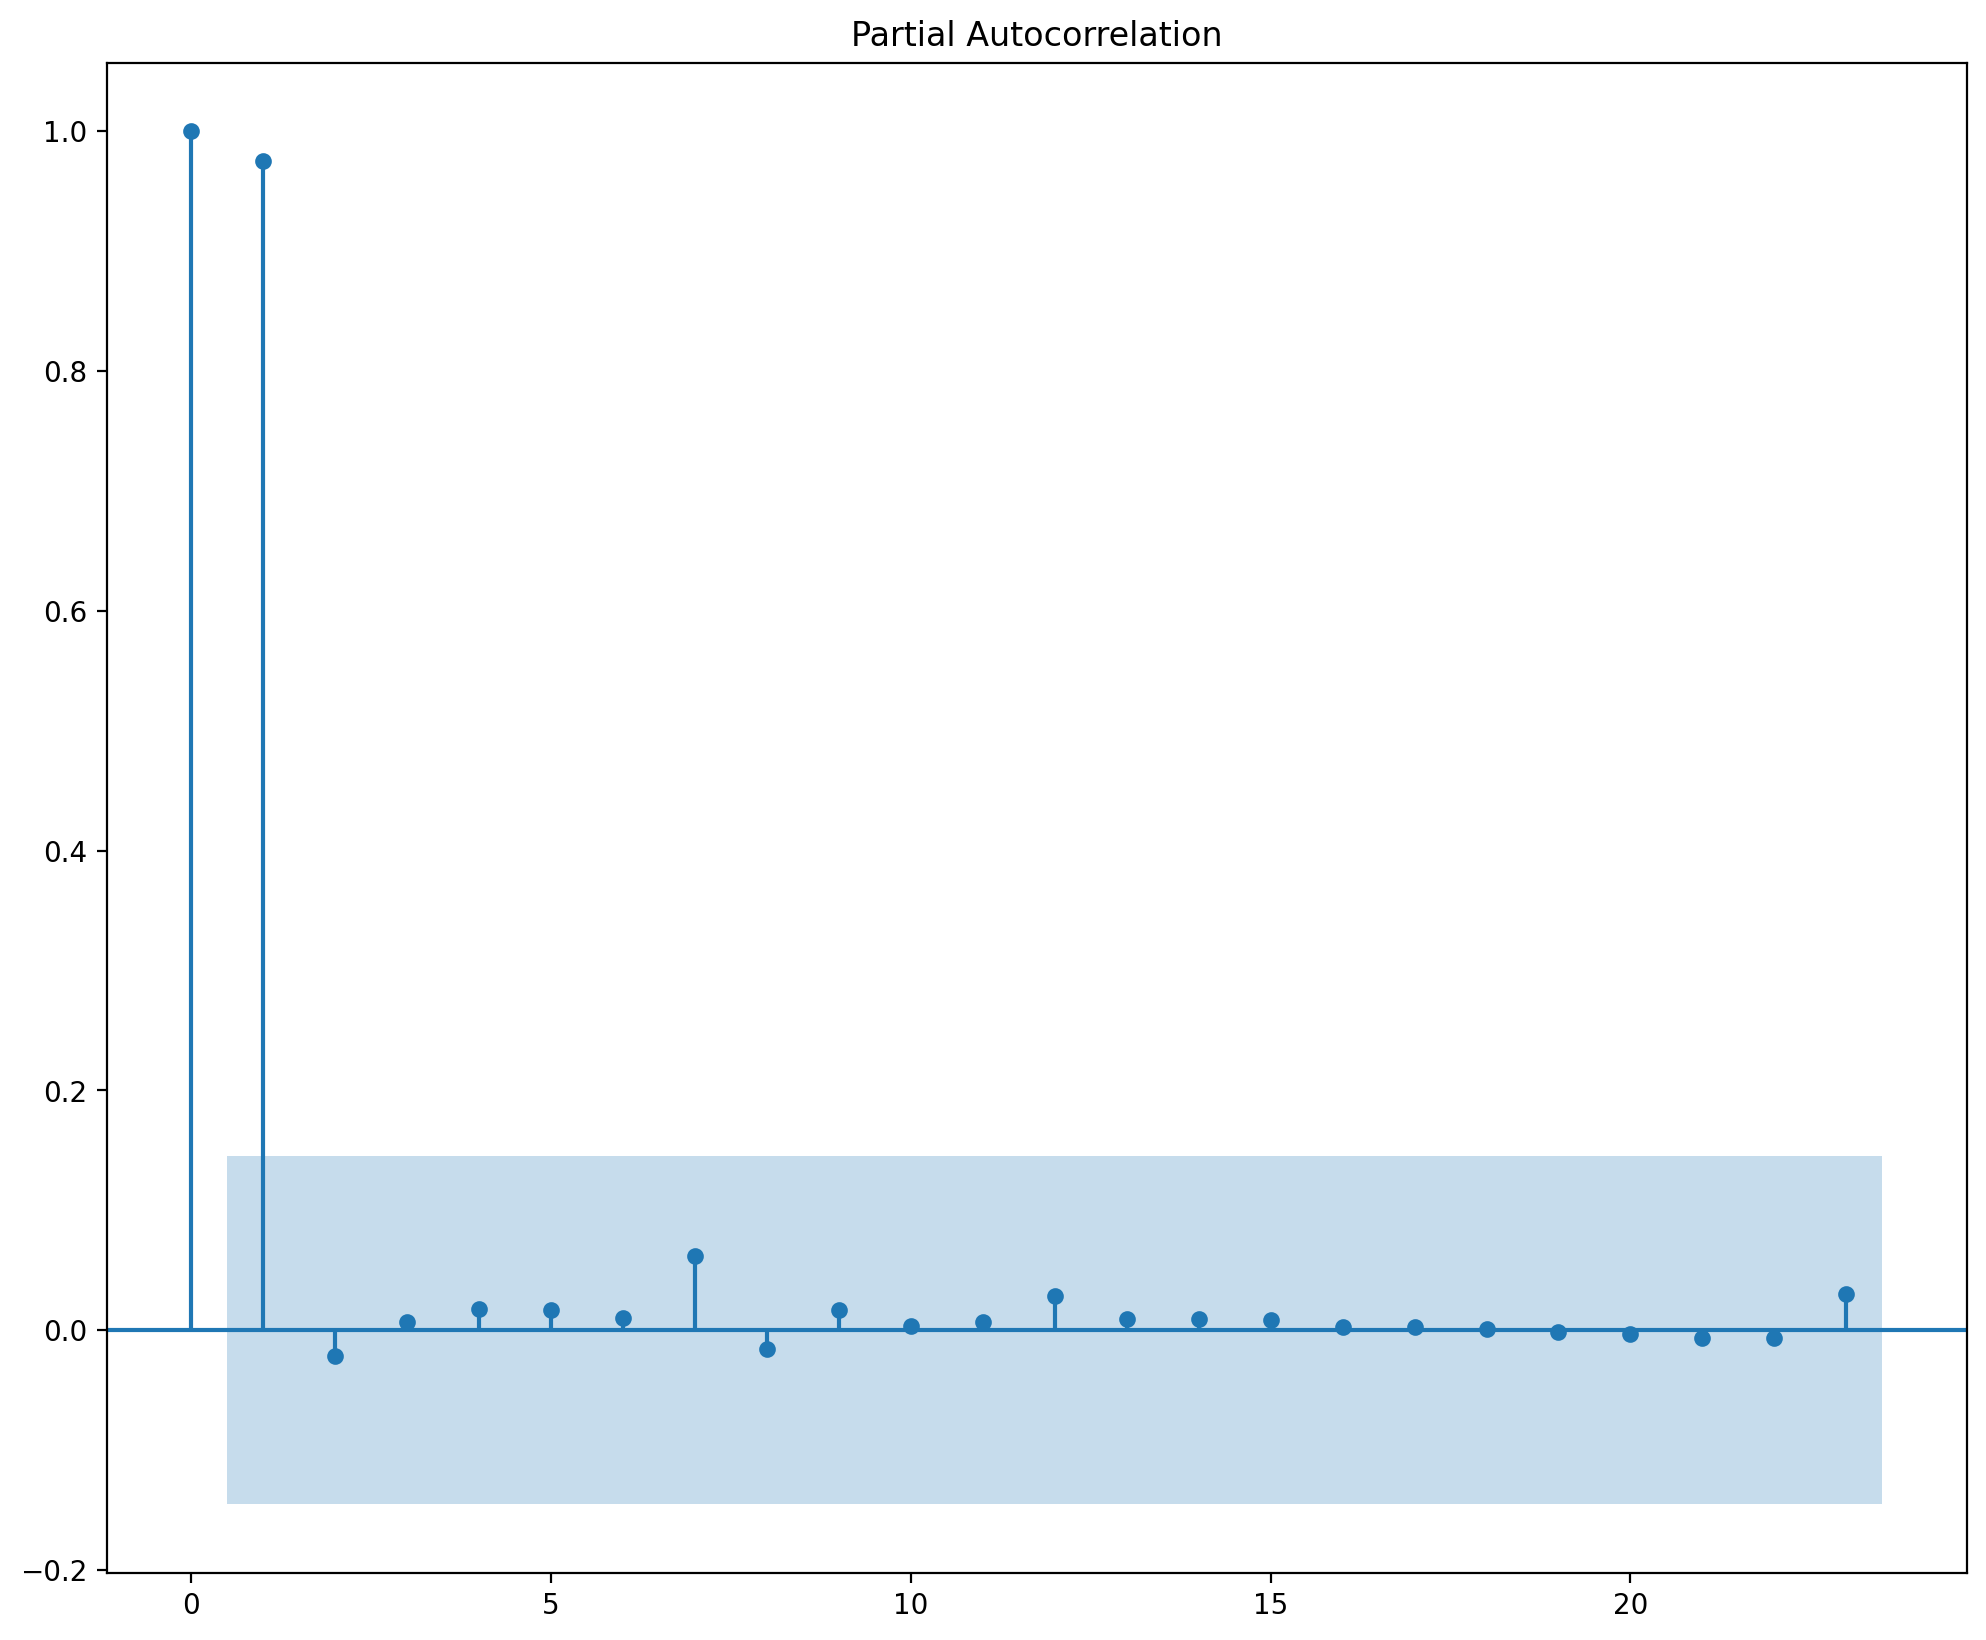

In [ ]:
plot_pacf(train);

In [ ]:
AR_model = AutoReg(train,lags=1).fit()
AR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              Confirmed   No. Observations:                  183
Model:                     AutoReg(1)   Log Likelihood                 252.943
Method:               Conditional MLE   S.D. of innovations              0.060
Date:                Sat, 14 Aug 2021   AIC                             -5.585
Time:                        13:04:57   BIC                             -5.532
Sample:                    01-23-2020   HQIC                            -5.563
                         - 07-22-2020                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.3706      0.026     14.479      0.000       0.320       0.421
Confirmed.L1     0.9772      0.002    533.668      0.000       0.974       0.981
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0234           +0.0000j            1.0234            0.0000
-----------------------------------------------------------------------------
"""

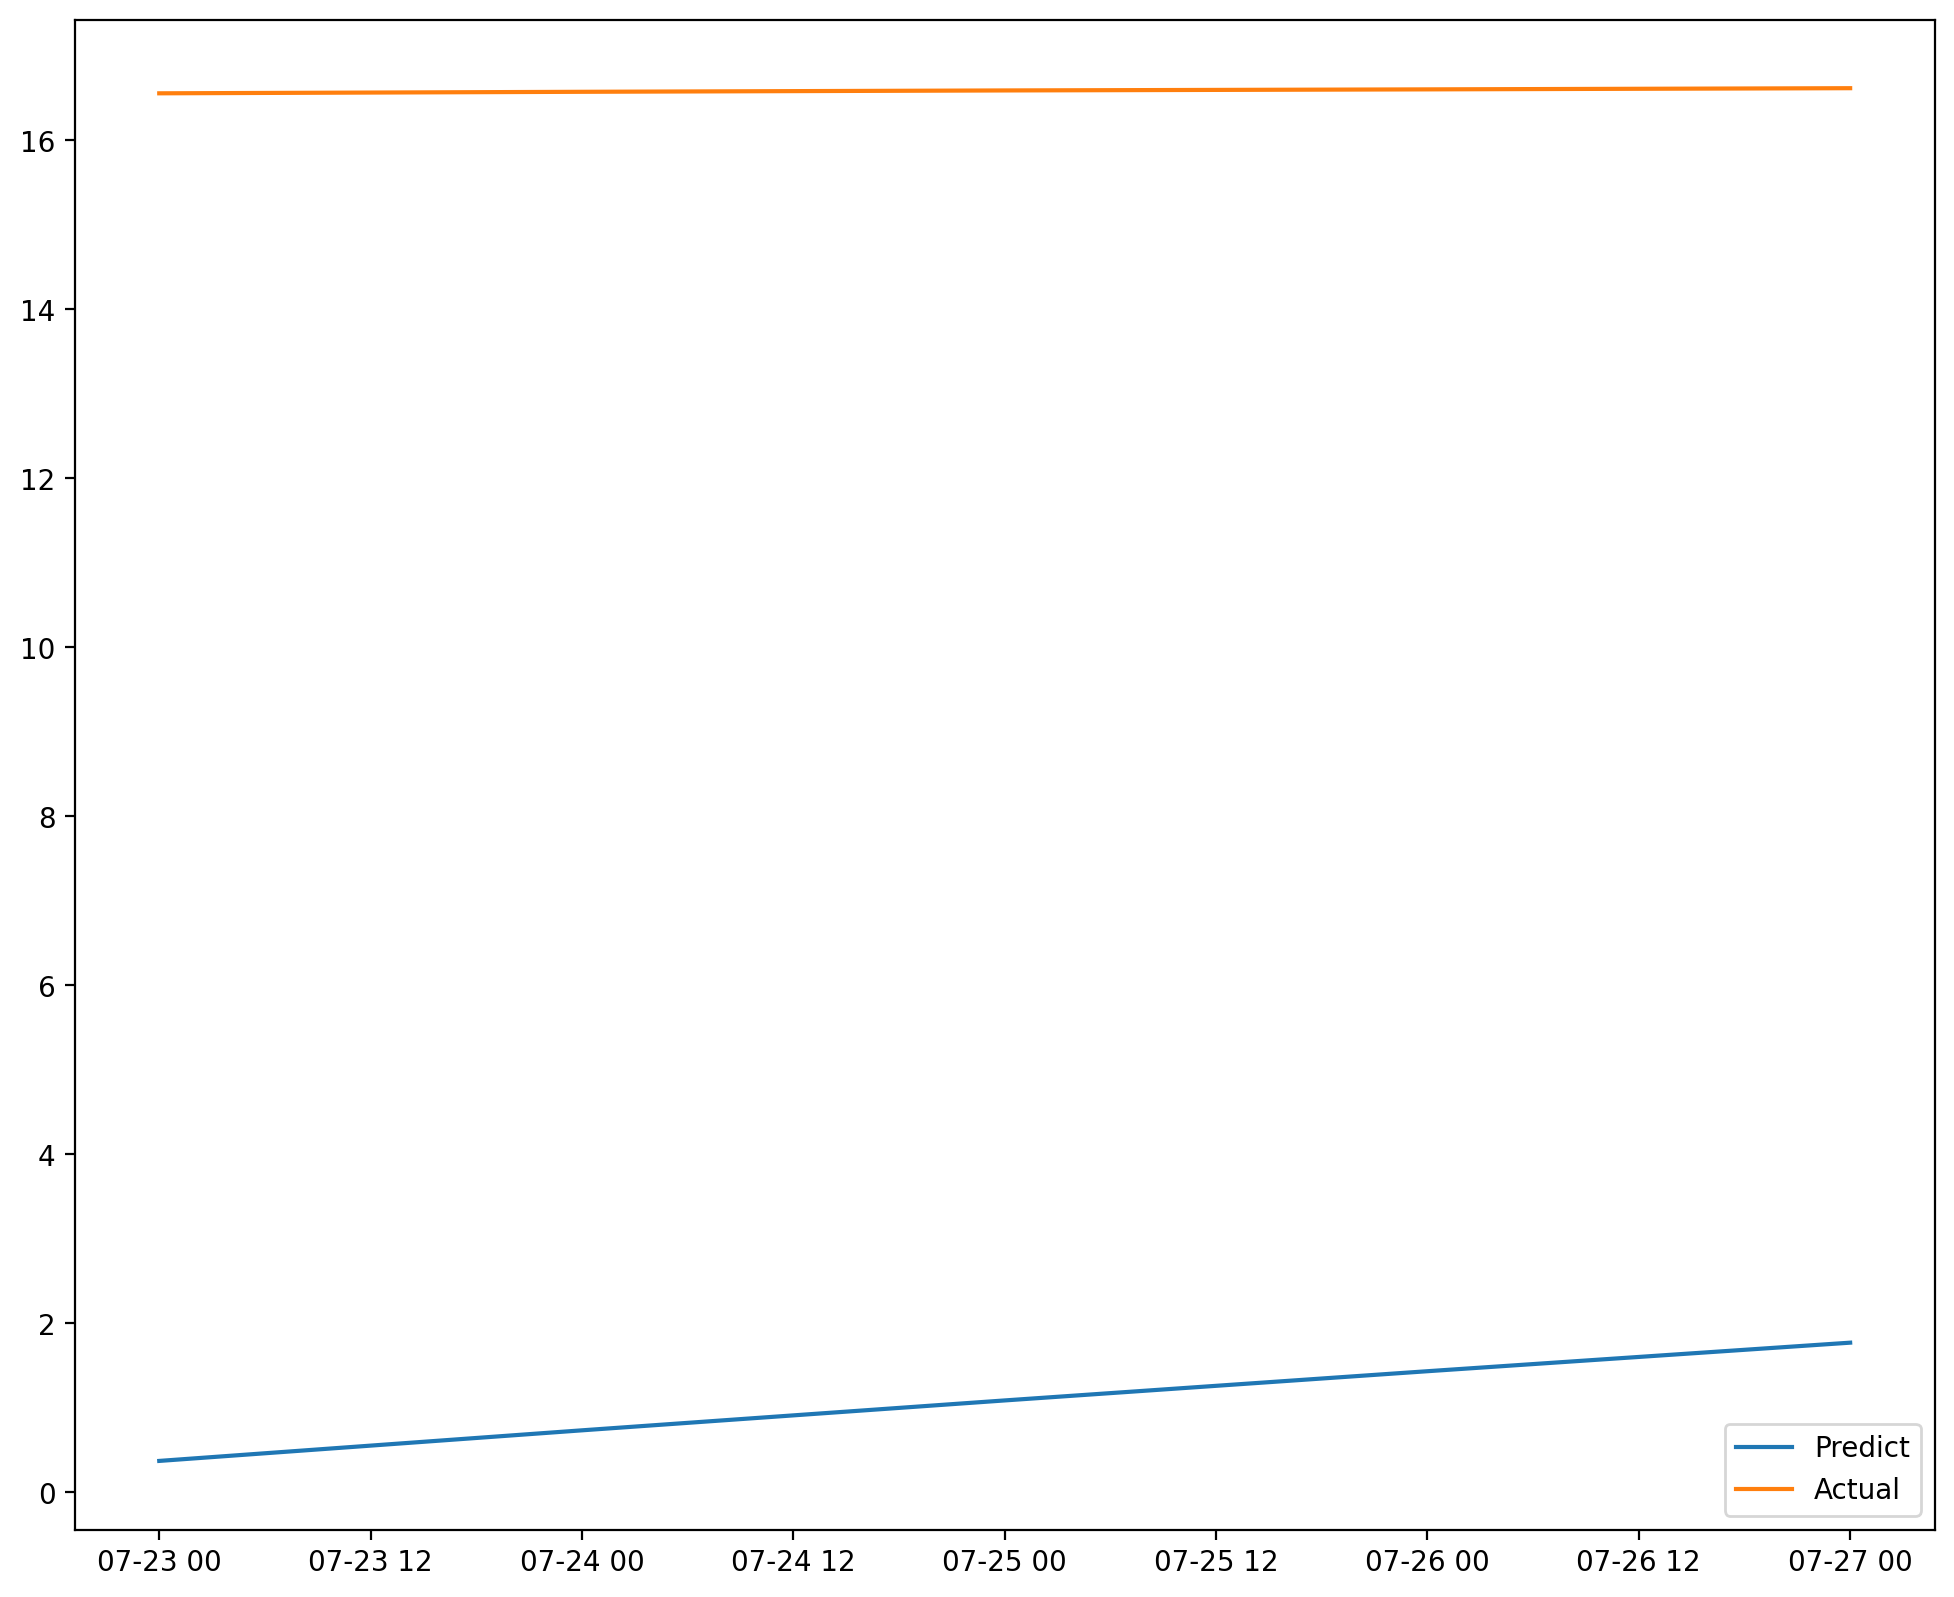

In [ ]:
predict_AR = AR_model.predict(start=len(train), end=len(y_log)-1, dynamic=True)
plt.plot(predict_AR,label='Predict')
plt.plot(test,label='Actual')
plt.legend()

In [ ]:
print(r2_score(test,predict_AR))
print(math.sqrt(mean_squared_error(test,predict_AR)))

-532235.9045244491
15.517676640989867


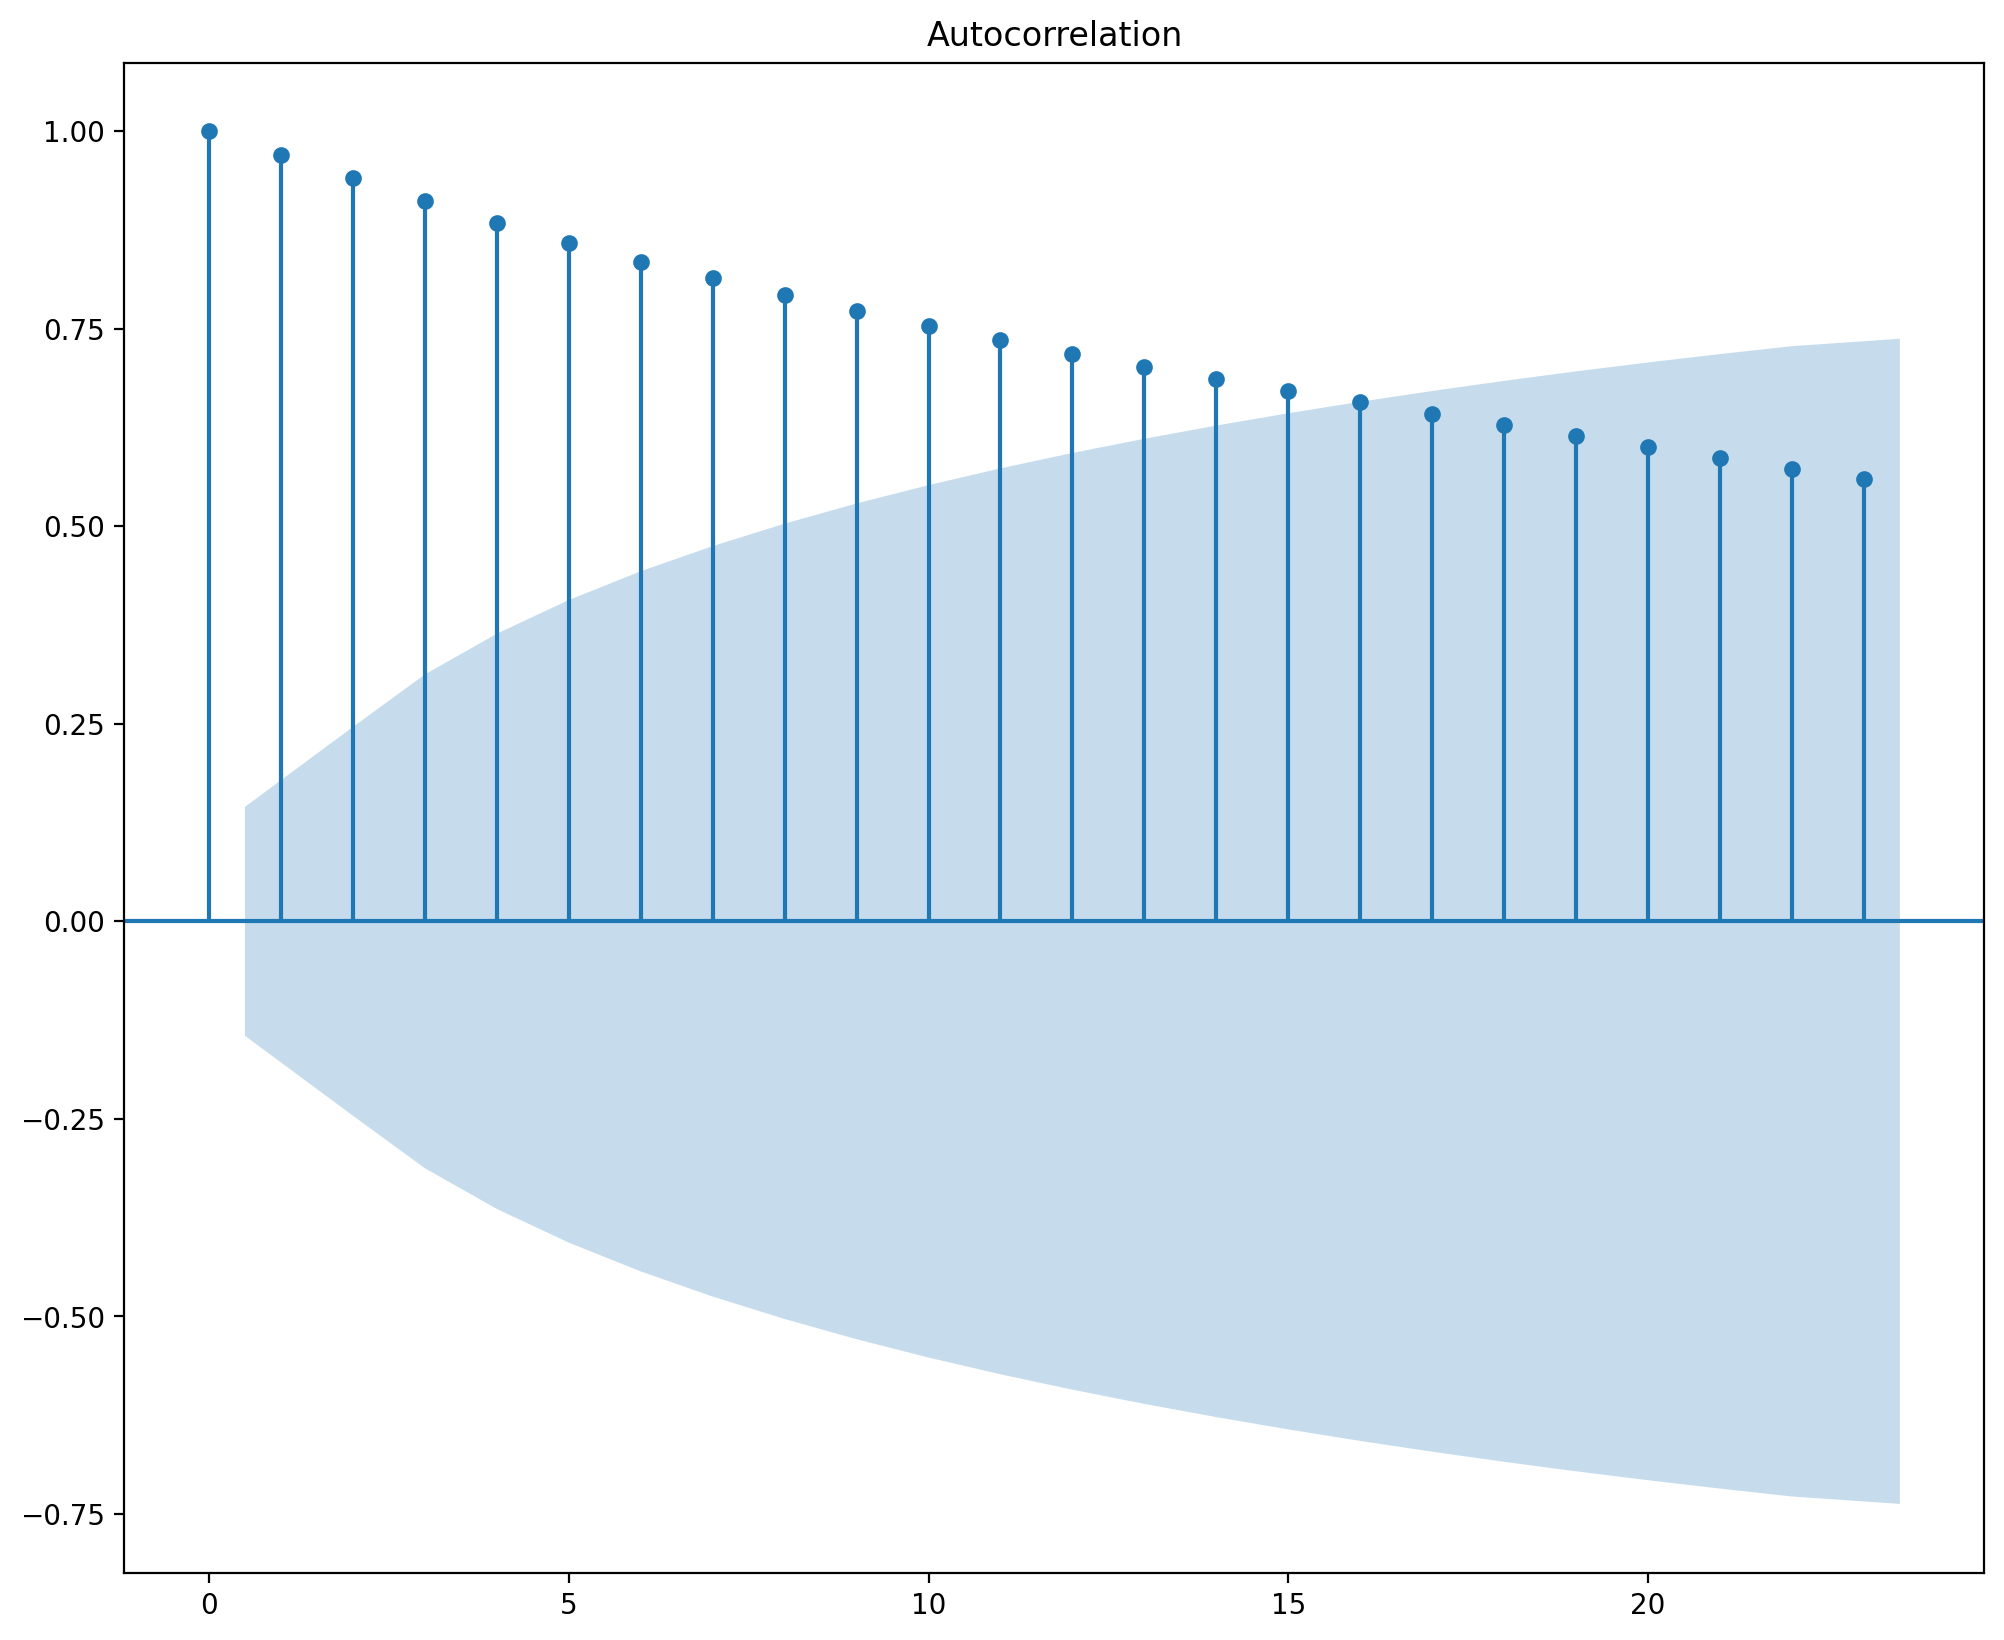

In [ ]:
plot_acf(train);


In [ ]:
ARMA_model = ARIMA(train, order=(1,0,4)).fit()
ARMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Confirmed   No. Observations:                  183
Model:                     ARMA(1, 4)   Log Likelihood                 265.994
Method:                       css-mle   S.D. of innovations              0.055
Date:                Sat, 14 Aug 2021   AIC                           -517.988
Time:                        13:05:00   BIC                           -495.522
Sample:                    01-22-2020   HQIC                          -508.881
                         - 07-22-2020                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.3948      5.015      2.272      0.023       1.565      21.224
ar.L1.Confirmed     0.9994      0.001   1159.683      0.000       0.998       1.001
ma.L1.Confirmed     0.5389      0.071      7.640      0.000       0.401       0.677
ma.L2.Confirmed     0.8000      0.088      9.125      0.000       0.628       0.972
ma.L3.Confirmed     0.6714      0.098      6.856      0.000       0.479       0.863
ma.L4.Confirmed     0.2954      0.064      4.651      0.000       0.171       0.420
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
MA.1            0.2447           -1.0547j            1.0827           -0.2137
MA.2            0.2447           +1.0547j            1.0827            0.2137
MA.3           -1.3810           -0.9902j            1.6993           -0.4010
MA.4           -1.3810           +0.9902j            1.6993            0.4010
-----------------------------------------------------------------------------
"""

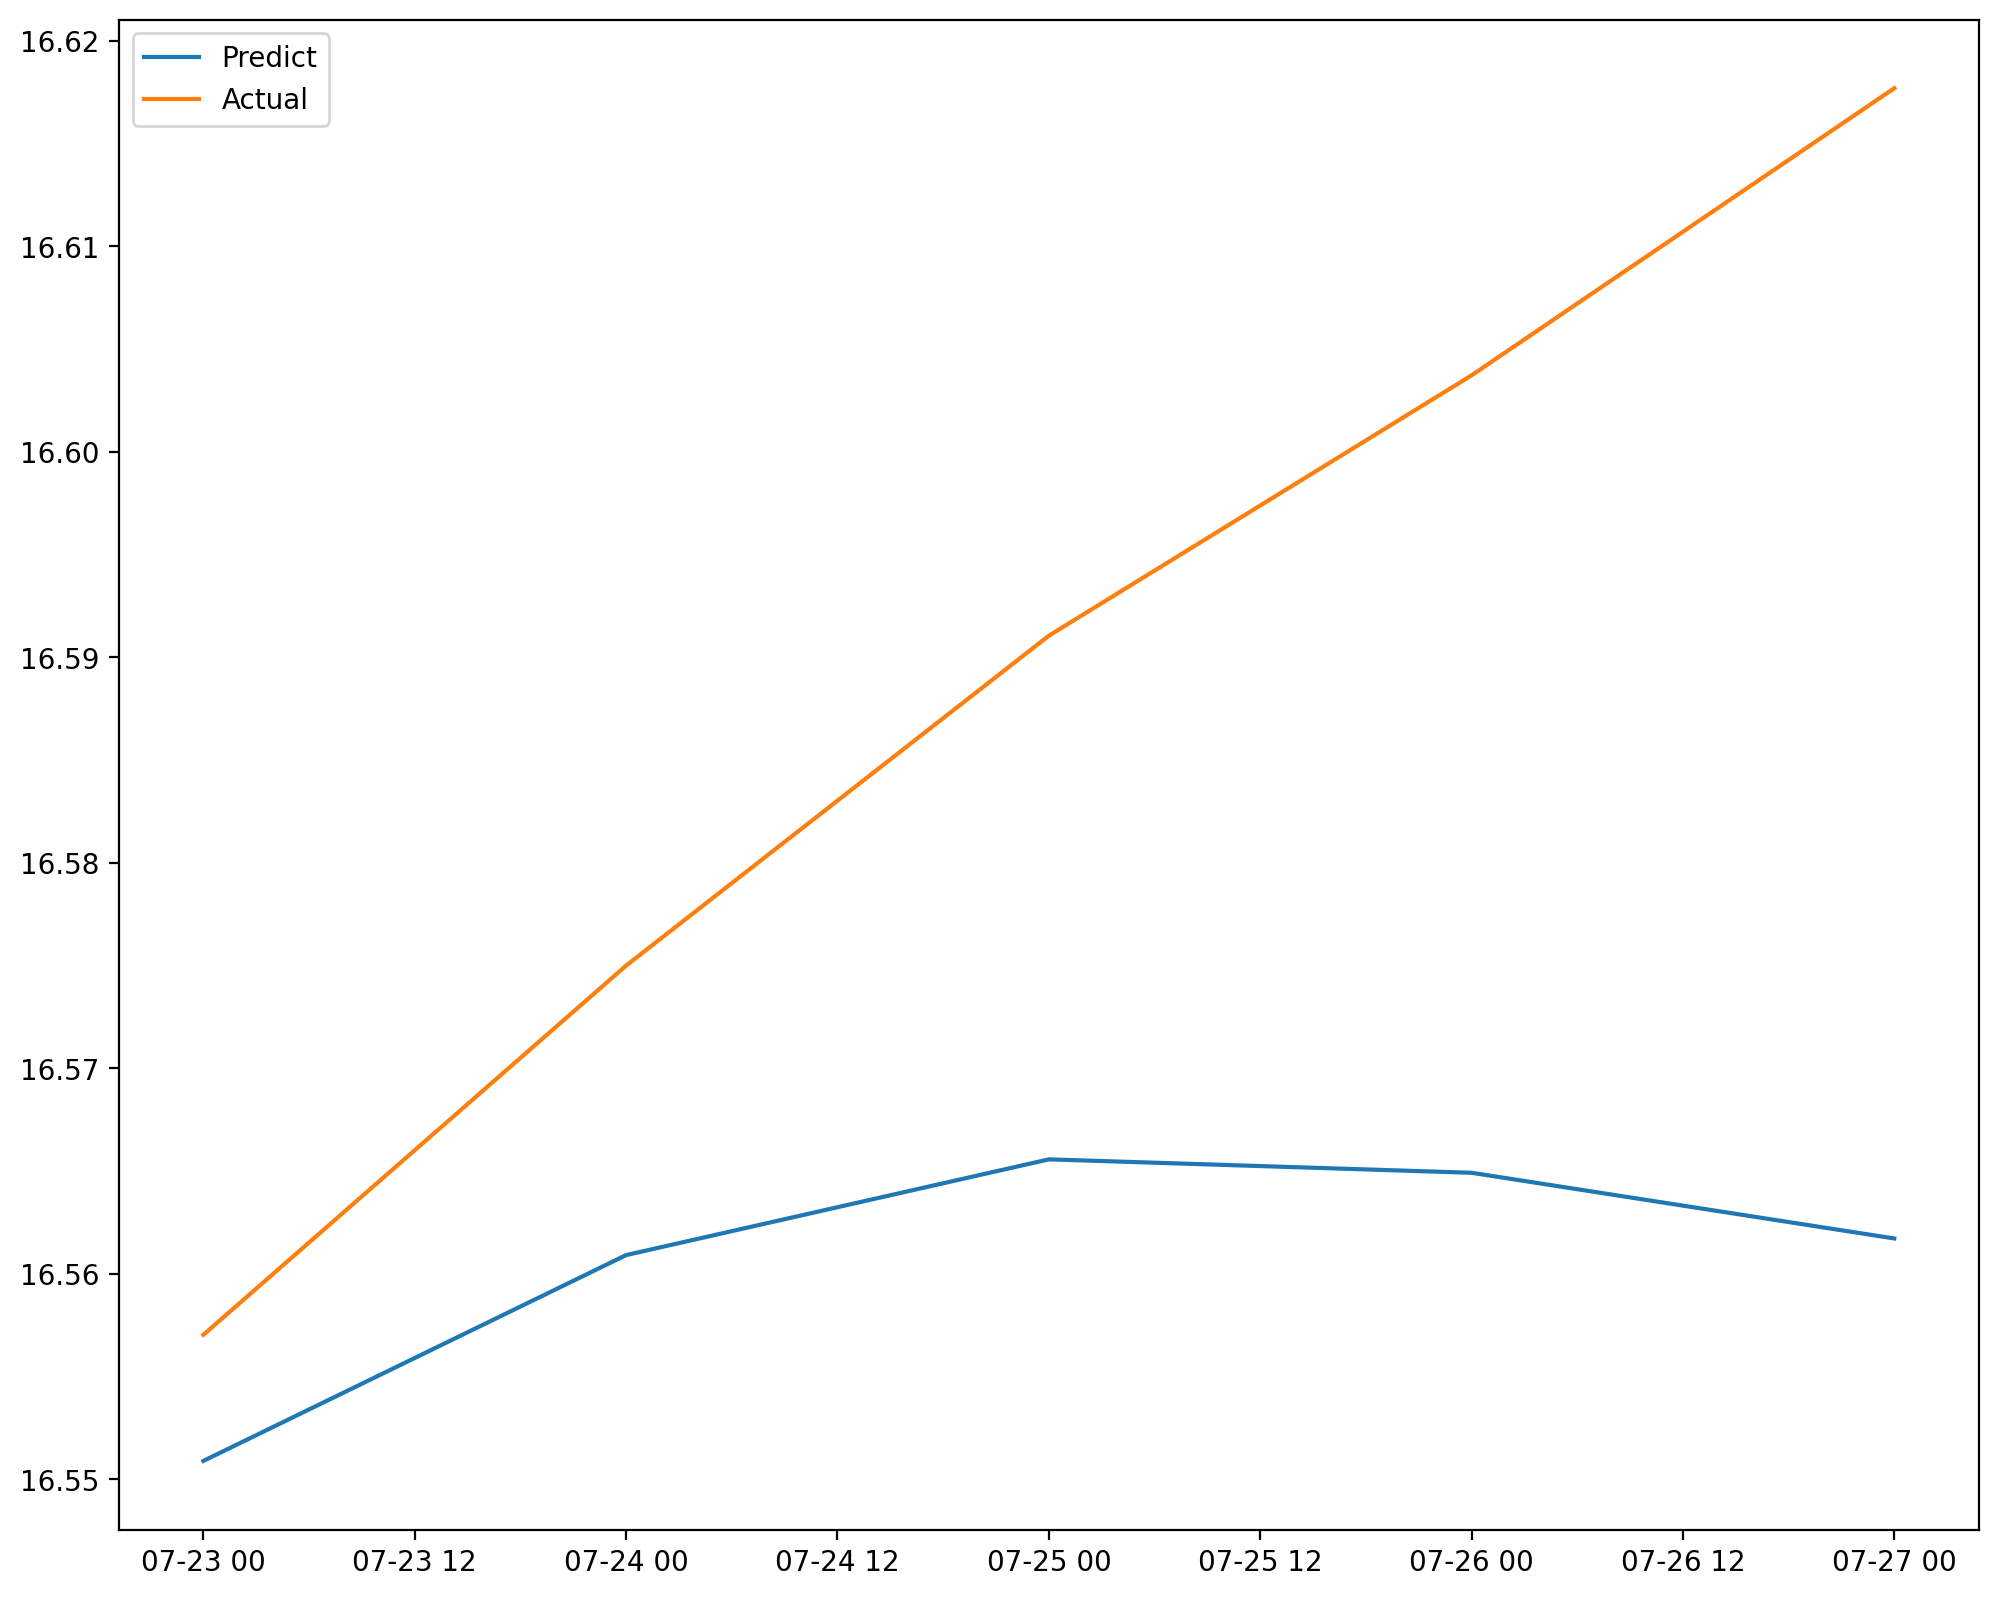

In [ ]:
predict_ARMA = ARMA_model.predict(start=len(train), end=len(y_log)-1, dynamic=True)
plt.plot(predict_ARMA,label='Predict')
plt.plot(test,label='Actual')
plt.legend()

In [ ]:
print(r2_score(test,predict_ARMA))
print(math.sqrt(mean_squared_error(test,predict_ARMA)))

-1.4420150815586066
0.033239032668039126


In [ ]:
auto_arima(train,trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-591.806, Time=0.68 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-508.556, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-582.015, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-587.487, Time=0.07 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-592.834, Time=0.36 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-593.467, Time=0.24 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-594.600, Time=0.58 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-589.730, Time=0.60 sec
 ARIMA(0,2,4)(0,0,0)[0]             : AIC=-593.295, Time=0.57 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=-592.123, Time=0.39 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-594.026, Time=0.67 sec

Best model:  ARIMA(0,2,3)(0,0,0)[0]          
Total fit time: 4.302 seconds


ARIMA(order=(0, 2, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
ARIMA_model = ARIMA(train,order=(0,2,3)).fit()
ARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.Confirmed   No. Observations:                  181
Model:                 ARIMA(0, 2, 3)   Log Likelihood                 302.013
Method:                       css-mle   S.D. of innovations              0.046
Date:                Sat, 14 Aug 2021   AIC                           -594.027
Time:                        13:05:06   BIC                           -578.034
Sample:                    01-24-2020   HQIC                          -587.543
                         - 07-22-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0016      0.001     -1.232      0.218      -0.004       0.001
ma.L1.D2.Confirmed    -0.8297      0.077    -10.719      0.000      -0.981      -0.678
ma.L2.D2.Confirmed     0.3677      0.117      3.156      0.002       0.139       0.596
ma.L3.D2.Confirmed    -0.1660      0.087     -1.912      0.056      -0.336       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.5263           -0.0000j            1.5263           -0.0000
MA.2            0.3445           -1.9567j            1.9868           -0.2223
MA.3            0.3445           +1.9567j            1.9868            0.2223
-----------------------------------------------------------------------------
"""

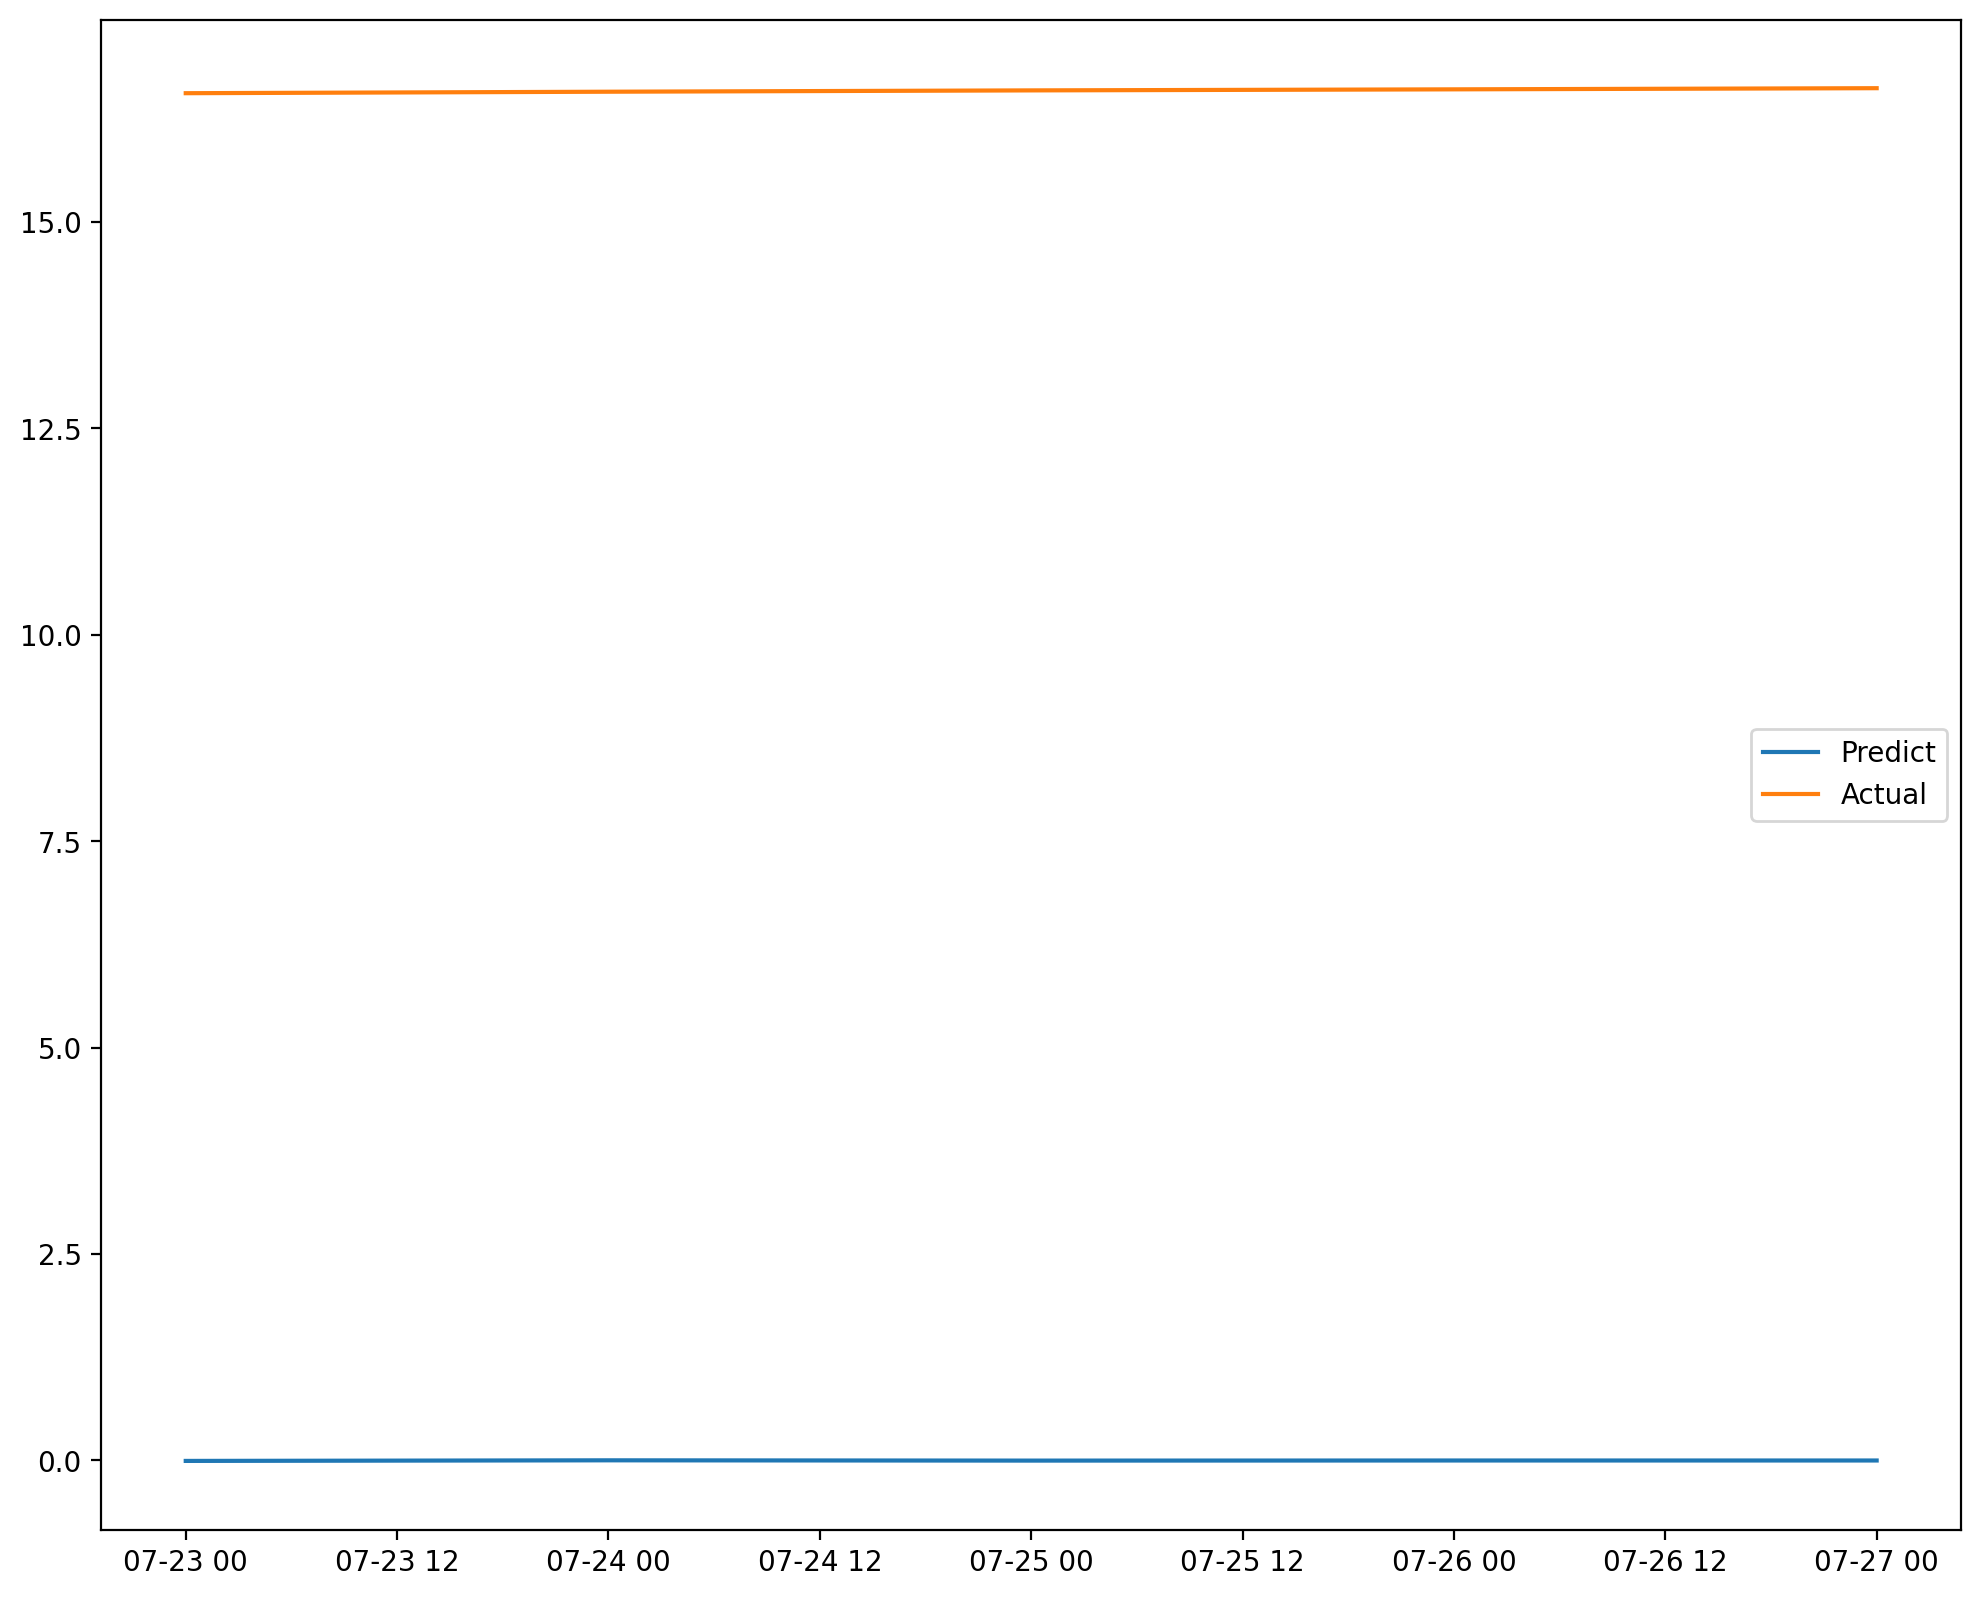

In [ ]:
predict_ARIMA = ARIMA_model.predict(start=len(train), end=len(y_log)-1,
                                    dynamic=True)
plt.plot(predict_ARIMA,label='Predict')
plt.plot(test,label='Actual')
plt.legend()

In [ ]:
print(r2_score(test,predict_ARIMA))
print(math.sqrt(mean_squared_error(test,predict_ARIMA)))


-608433.884844085
16.591332186421532
